In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
#import sys
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

In [3]:
from sabreMod import sosf,sosfn,acf,sosfh
from sabre import sosfw

In [4]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

In [5]:
samples=pd.read_csv('Res//listdata.txt',header=None)
#samples

In [6]:
d=840000
pc=d*(4.85*10**(-6))
pc

4.074

In [7]:
i=6
samples[0][i]

'595IOC'

In [8]:
dt=pd.read_csv('Res//'+samples[0][i]+'.csv')
#dt=pd.read_csv('datos Car.csv')
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
#os.remove(datap)
dt.describe()

,X,Y,Center,Peak,Width,RV,Sig
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,103.000000
mean,110.916610,9.703390,5003.092347,61.133161,0.957415,-202.082578,19.359186
std,6.658528,6.986323,0.211667,52.852027,0.452474,12.673717,7.242066
min,100.128000,0.000000,5002.349000,5.633000,-1.096000,-246.591148,3.324603
25%,105.849600,2.000000,5002.993000,24.367500,0.914250,-208.031092,15.131764
50%,110.140800,11.000000,5003.132000,44.135000,1.019000,-199.708347,18.029210
75%,116.935200,15.000000,5003.223750,76.387500,1.111500,-194.214737,21.790660
max,121.584000,22.000000,5003.520000,293.000000,2.082000,-176.476512,49.368493


(99.0552, 122.6568, -1.1, 23.1)

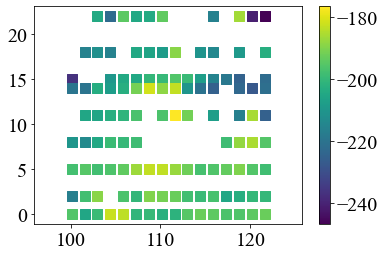

In [9]:
plt.scatter(dt.X,dt.Y,c=dt.RV, s=100,marker='s')
plt.colorbar()
plt.axis('equal')

(99.0552, 122.6568, -1.1, 23.1)

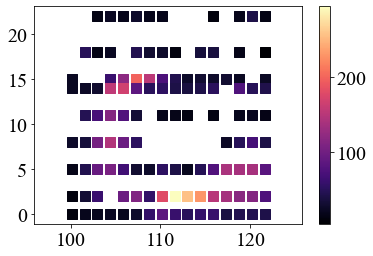

In [10]:
plt.scatter(dt.X,dt.Y,c=dt.Peak, s=100,marker='s',cmap='magma')
plt.colorbar()
plt.axis('equal')

1.0


[None, None]

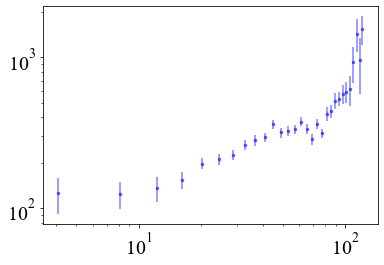

In [11]:
SF=sosf(dt)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [12]:
x=SF['Lag']
y=SF['Nmqvd']-2*(dt.RV.std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([42.22721572, 48.51388765, 51.73508496, 65.8357829 , 70.99232654,
       76.12848509, 77.84922439])

In [13]:
s=SFr[0]

In [14]:
ss=np.round(2*(dt.RV.std())**2,2)

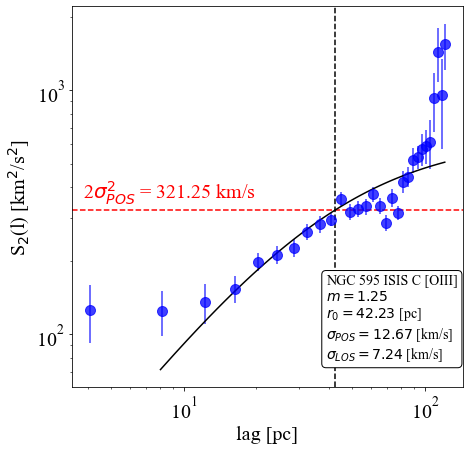

In [15]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=2*(dt.RV.std())**2, color='r', linestyle='--')
ax.text(0.25, 0.51,'2$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.25

x=np.linspace(8,int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*2*(dt.RV.std())**2

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 595 ISIS C ' '[OIII]', r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (dt.RV.std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(dt.Sig.std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

fig.savefig('Img//'+samples[0][i]+'.pdf')

In [16]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 7.08155632019043 seconds ---
